# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [2]:
tickers = ['VGTSX', 'VIMSX', 'VIVAX', 'VISVX', 'NAESX', 'VWO', 'SPY', 'USRT', 'IAU', 'VGLT', 'VONG', 'IXUS', 'VCSH', 'VTIP',
            'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS', 'EMB']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', dividends=True)

In [3]:
r_d_all.index = pd.to_datetime(r_d_all.index.date)

In [4]:
r_d_all

,VGTSX,VIMSX,VIVAX,VISVX,NAESX,VWO,SPY,USRT,IAU,VGLT,...,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS,EMB
1980-01-03,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,-0.004365,-0.007165,-0.002177,-0.010818,-0.011225,0.001890,0.000517,0.000493,0.012635,0.004969,...,-0.004069,-0.000192,0.000000,0.000081,0.004648,0.002390,0.004970,0.000961,-0.004196,-0.000639
2024-06-17,0.002024,0.005880,0.005697,0.006977,0.006252,0.003772,0.006770,-0.000739,-0.005218,-0.005956,...,0.003035,-0.001056,-0.000168,-0.002265,-0.005505,-0.001748,0.011754,-0.002356,0.002603,-0.001570
2024-06-18,0.003029,0.003322,0.002772,0.001872,0.001962,0.005481,0.002164,0.002959,0.004105,0.005652,...,0.004190,0.001249,0.001844,0.002189,0.005064,0.001911,0.000297,0.002186,0.003461,0.003437
2024-06-20,0.000336,-0.000927,0.001322,-0.001121,-0.002774,-0.001246,-0.002314,-0.002827,0.012492,-0.004159,...,-0.000232,-0.000384,0.000502,-0.001537,-0.003691,-0.001271,-0.007400,-0.001222,-0.000493,-0.001916


In [5]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11211 entries, 1980-01-03 to 2024-06-21
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VGTSX   7084 non-null   float64
 1   VIMSX   6563 non-null   float64
 2   VIVAX   7966 non-null   float64
 3   VISVX   6563 non-null   float64
 4   NAESX   11211 non-null  float64
 5   VWO     4853 non-null   float64
 6   SPY     7904 non-null   float64
 7   USRT    4312 non-null   float64
 8   IAU     4881 non-null   float64
 9   VGLT    3640 non-null   float64
 10  VONG    3459 non-null   float64
 11  IXUS    2931 non-null   float64
 12  VCSH    3667 non-null   float64
 13  VTIP    2937 non-null   float64
 14  VCIT    3667 non-null   float64
 15  TLT     5511 non-null   float64
 16  BNDX    2781 non-null   float64
 17  QQQ     6362 non-null   float64
 18  BND     4330 non-null   float64
 19  VXUS    3370 non-null   float64
 20  EMB     4153 non-null   float64
dtypes: float64(21)
mem

In [6]:
start_dates = fnc.start_dates(r_d_all)
start_dates

{'NAESX': Timestamp('1980-01-03 00:00:00'),
 'VIVAX': Timestamp('1992-11-02 00:00:00'),
 'SPY': Timestamp('1993-02-01 00:00:00'),
 'VGTSX': Timestamp('1996-04-30 00:00:00'),
 'VIMSX': Timestamp('1998-05-22 00:00:00'),
 'VISVX': Timestamp('1998-05-22 00:00:00'),
 'QQQ': Timestamp('1999-03-11 00:00:00'),
 'TLT': Timestamp('2002-07-31 00:00:00'),
 'IAU': Timestamp('2005-01-31 00:00:00'),
 'VWO': Timestamp('2005-03-11 00:00:00'),
 'BND': Timestamp('2007-04-11 00:00:00'),
 'USRT': Timestamp('2007-05-07 00:00:00'),
 'EMB': Timestamp('2007-12-20 00:00:00'),
 'VCSH': Timestamp('2009-11-24 00:00:00'),
 'VCIT': Timestamp('2009-11-24 00:00:00'),
 'VGLT': Timestamp('2010-01-05 00:00:00'),
 'VONG': Timestamp('2010-09-23 00:00:00'),
 'VXUS': Timestamp('2011-01-31 00:00:00'),
 'VTIP': Timestamp('2012-10-17 00:00:00'),
 'IXUS': Timestamp('2012-10-25 00:00:00'),
 'BNDX': Timestamp('2013-06-05 00:00:00')}

As there are some assets which do not have enough data, I will filter the dataset by removing those assets so that I can at least have enough data to make some conclusions or do some reasonable backtests.

In [7]:
start_year = 2024
assets_before_start_year = [asset for asset, start_date in start_dates.items() if pd.to_datetime(start_date).year < start_year]
assets_before_start_year

['NAESX',
 'VIVAX',
 'SPY',
 'VGTSX',
 'VIMSX',
 'VISVX',
 'QQQ',
 'TLT',
 'IAU',
 'VWO',
 'BND',
 'USRT',
 'EMB',
 'VCSH',
 'VCIT',
 'VGLT',
 'VONG',
 'VXUS',
 'VTIP',
 'IXUS',
 'BNDX']

In [8]:
r_d = r_d_all[assets_before_start_year]
r_d

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
1980-01-03,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-04,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-07,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-08,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1980-01-09,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,-0.011225,-0.002177,0.000517,-0.004365,-0.007165,-0.010818,0.004970,0.004648,0.012635,0.001890,...,0.000493,-0.000639,-0.000192,0.000081,0.004969,0.003148,-0.004196,0.000000,-0.004069,0.002390
2024-06-17,0.006252,0.005697,0.006770,0.002024,0.005880,0.006977,0.011754,-0.005505,-0.005218,0.003772,...,-0.000739,-0.001570,-0.001056,-0.002265,-0.005956,0.009517,0.002603,-0.000168,0.003035,-0.001748
2024-06-18,0.001962,0.002772,0.002164,0.003029,0.003322,0.001872,0.000297,0.005064,0.004105,0.005481,...,0.002959,0.003437,0.001249,0.002189,0.005652,0.001103,0.003461,0.001844,0.004190,0.001911
2024-06-20,-0.002774,0.001322,-0.002314,0.000336,-0.000927,-0.001121,-0.007400,-0.003691,0.012492,-0.001246,...,-0.002827,-0.001916,-0.000384,-0.001537,-0.004159,-0.006211,-0.000493,0.000502,-0.000232,-0.001271


In [9]:
r_d.dropna(inplace=True)
r_d

C:\Users\user\AppData\Local\Temp\ipykernel_7556\239412674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_d.dropna(inplace=True)


,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
2013-06-05,-0.011943,-0.009019,-0.010880,-0.012600,-0.011834,-0.011980,-0.012433,0.009214,0.002946,-0.016693,...,-0.006555,-0.004674,-0.000227,-0.002439,0.009454,-0.013623,-0.016843,0.000000,-0.017005,0.001193
2013-06-06,0.010010,0.006500,0.007013,0.002734,0.009863,0.008781,0.004638,-0.000407,0.008076,0.008388,...,0.012280,0.001051,-0.000342,0.003617,0.001338,0.007487,0.005646,-0.000604,0.003267,-0.001390
2013-06-07,0.008414,0.008784,0.009873,0.003636,0.011859,0.007875,0.013060,-0.011984,-0.024035,-0.003565,...,-0.003983,-0.003827,0.000795,-0.003019,-0.013969,0.012427,0.005614,-0.002014,0.007281,-0.001989
2013-06-10,0.002040,0.000256,0.000000,0.000453,-0.000689,0.002056,0.000390,-0.003180,0.005224,-0.011528,...,-0.002727,-0.007001,0.000000,-0.003909,-0.004434,0.000000,-0.000770,0.000000,-0.000190,-0.007173
2013-06-11,-0.009808,-0.006913,-0.008029,-0.009053,-0.010349,-0.010260,-0.009502,0.007915,-0.005197,-0.016086,...,-0.012942,-0.014976,-0.001248,-0.002452,0.005816,-0.007593,-0.012907,-0.002018,-0.012746,-0.000200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-14,-0.011225,-0.002177,0.000517,-0.004365,-0.007165,-0.010818,0.004970,0.004648,0.012635,0.001890,...,0.000493,-0.000639,-0.000192,0.000081,0.004969,0.003148,-0.004196,0.000000,-0.004069,0.002390
2024-06-17,0.006252,0.005697,0.006770,0.002024,0.005880,0.006977,0.011754,-0.005505,-0.005218,0.003772,...,-0.000739,-0.001570,-0.001056,-0.002265,-0.005956,0.009517,0.002603,-0.000168,0.003035,-0.001748
2024-06-18,0.001962,0.002772,0.002164,0.003029,0.003322,0.001872,0.000297,0.005064,0.004105,0.005481,...,0.002959,0.003437,0.001249,0.002189,0.005652,0.001103,0.003461,0.001844,0.004190,0.001911
2024-06-20,-0.002774,0.001322,-0.002314,0.000336,-0.000927,-0.001121,-0.007400,-0.003691,0.012492,-0.001246,...,-0.002827,-0.001916,-0.000384,-0.001537,-0.004159,-0.006211,-0.000493,0.000502,-0.000232,-0.001271


<Axes: title={'center': 'Annualized Returns'}>

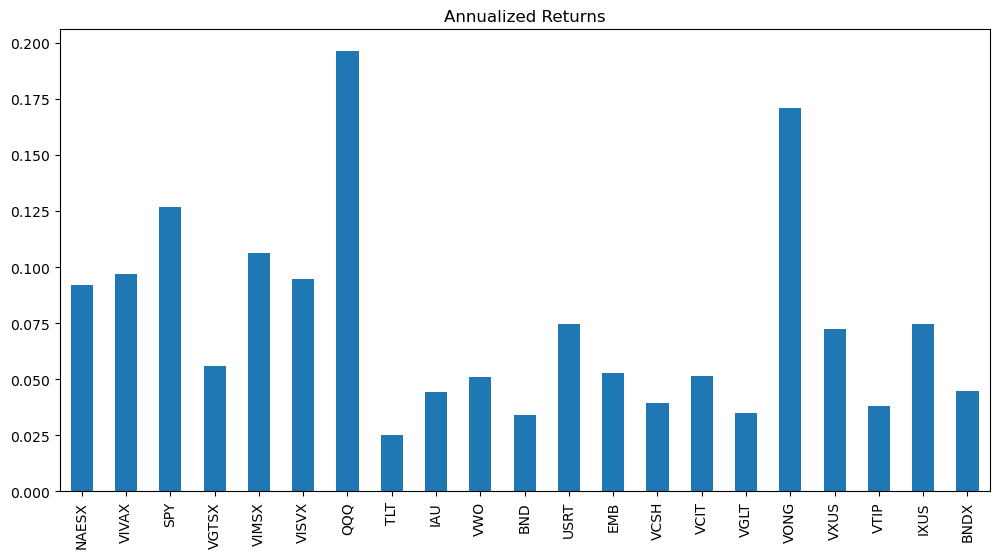

In [10]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

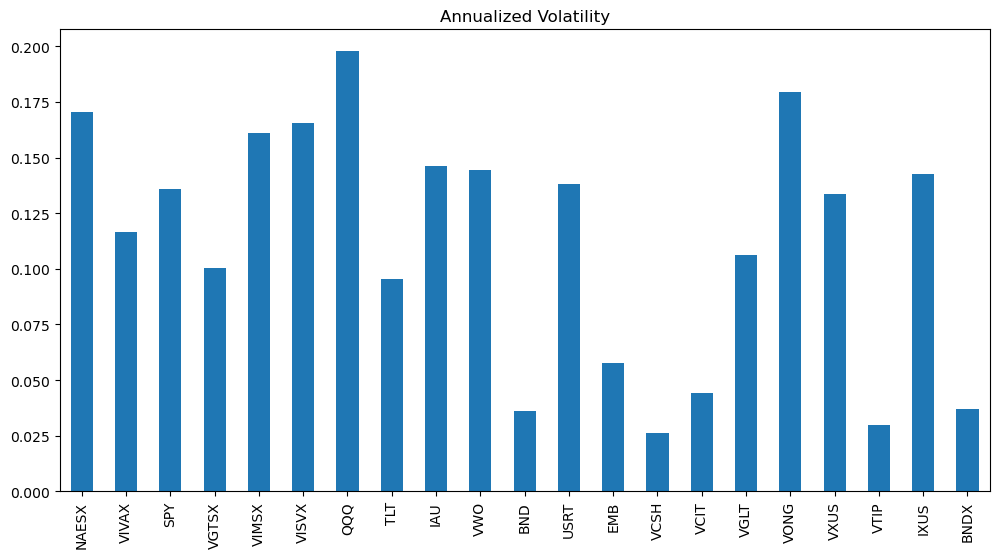

In [11]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

<Axes: title={'center': 'Sharpe Ratio of Individual Assets'}>

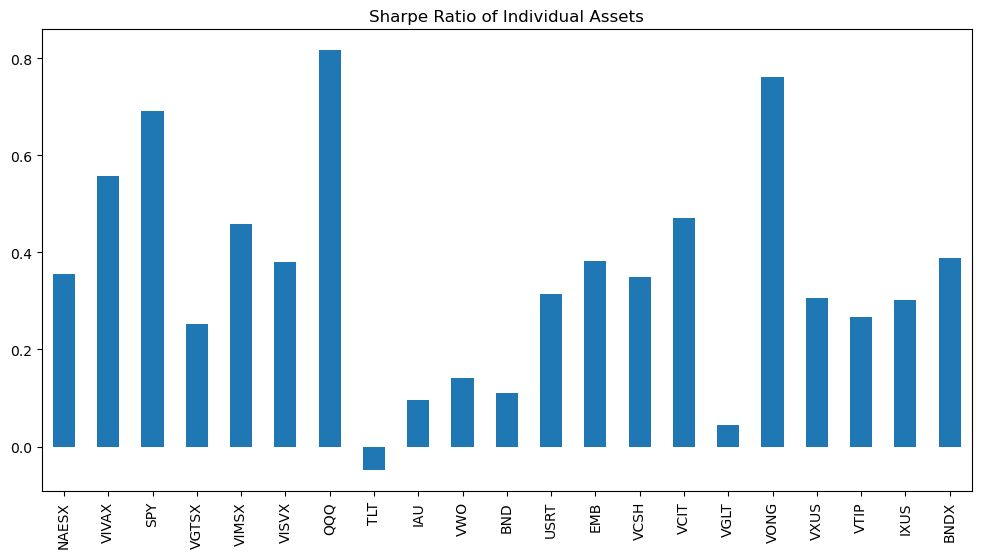

In [12]:
fnc.sharpe_ratio(r_d, 0.03, 252).plot.bar(figsize=(12,6), title='Sharpe Ratio of Individual Assets')

In [13]:
import seaborn as sns

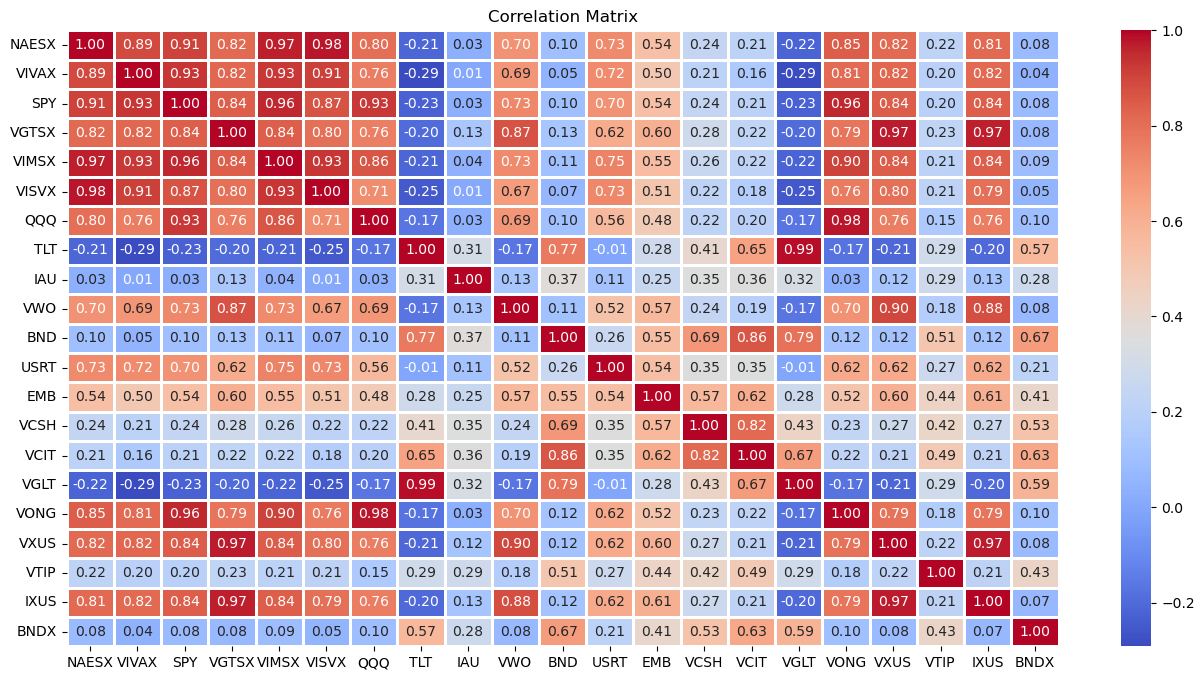

In [14]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [15]:
r_d.corr().describe()

,NAESX,VIVAX,SPY,VGTSX,VIMSX,VISVX,QQQ,TLT,IAU,VWO,...,USRT,EMB,VCSH,VCIT,VGLT,VONG,VXUS,VTIP,IXUS,BNDX
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.535538,0.508947,0.544579,0.540888,0.552231,0.509563,0.501015,0.140814,0.205600,0.487428,...,0.489487,0.521992,0.392885,0.413454,0.143542,0.524012,0.539870,0.316496,0.538388,0.292670
std,0.412195,0.429979,0.424942,0.394594,0.420610,0.415370,0.384832,0.437593,0.223866,0.360906,...,0.270523,0.153628,0.216381,0.266122,0.442959,0.393972,0.401003,0.190833,0.398338,0.276607
min,-0.217996,-0.291540,-0.229960,-0.199266,-0.218702,-0.253534,-0.170024,-0.291332,0.006106,-0.169850,...,-0.006282,0.253816,0.210427,0.156054,-0.291540,-0.173955,-0.212706,0.151388,-0.202031,0.041845
25%,0.210954,0.156054,0.196615,0.223488,0.210966,0.179986,0.151388,-0.210332,0.032756,0.180300,...,0.273002,0.481195,0.240479,0.210954,-0.212706,0.176860,0.213215,0.210966,0.213224,0.076837
50%,0.726614,0.719119,0.729223,0.757375,0.746175,0.712936,0.692183,-0.167202,0.131339,0.668242,...,0.562364,0.538638,0.284178,0.223488,-0.169850,0.700813,0.761728,0.227639,0.758284,0.104207
75%,0.845271,0.822998,0.905335,0.842662,0.904668,0.796828,0.761728,0.409072,0.308220,0.727027,...,0.698449,0.569888,0.430762,0.627844,0.430762,0.811102,0.844390,0.422099,0.840436,0.525732
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

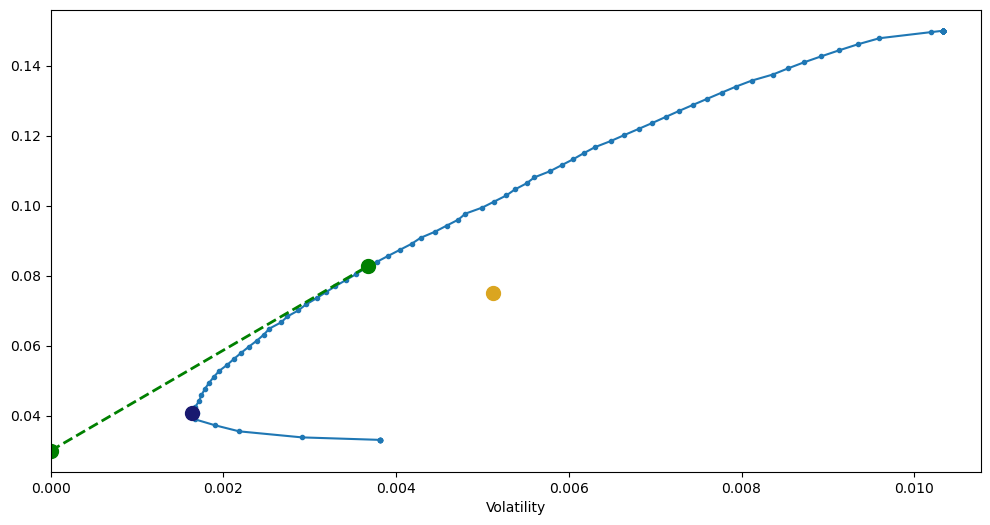

In [16]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_ew= True, show_msr=True, riskfree_rate=0.03, max_asset_weight=0.25) #max allocation for each asset = 25%

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [17]:
target_rets = [0.06, 0.08, 0.10, 0.12, annu_r.mean()]
backtest = fnc.combined_backtesting_result(r_d, portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=900,
                                            rolling_period=0, reweight_period=90, weights_column=True, max_asset_weight= 0.20, riskfree_rate=0.03,
                                              target_returns=target_rets, weight_constraints = 1)

In [18]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
2016-12-29                0.001172     1001.172148  0.000000   1001.172148   
2016-12-30                0.000715     1001.887986  0.000000   1001.887986   
2017-01-03               -0.000385     1001.502278 -0.000385   1001.887986   
2017-01-04                0.001008     1002.511896  0.000000   1002.511896   
2017-01-05                0.001221      1003.73615  0.000000   1003.736150   
...                            ...             ...       ...           ...   
2024-06-14                0.000466     1375.208396  0.000000   1375.208396   
2024-06-17               -0.001169     1373.601301 -0.001169   1375.208396   
2024-06-18                0.001915     1376.231603  0.000000   1376.231604   
2024-06-20               -0.000648     1375.339485 -0.000648   1376.231604   
2024-06-21               -0.000070     1375.243823 -0.000718   1376.231604   

                                                               \
                                                      Weights   
2016-12-29  {'NAESX': 2.5910305279633527e-09, 'VIVAX': 0.0...   
2016-12-30  {'NAESX': 2.5910305279633527e-09, 'VIVAX': 0.0...   
2017-01-03  {'NAESX': 2.5910305279633527e-09, 'VIVAX': 0.0...   
2017-01-04  {'NAESX': 2.5910305279633527e-09, 'VIVAX': 0.0...   
2017-01-05  {'NAESX': 2.5910305279633527e-09, 'VIVAX': 0.0...   
...                                                       ...   
2024-06-14  {'NAESX': 0.0, 'VIVAX': 0.03016141653615345, '...   
2024-06-17  {'NAESX': 0.0, 'VIVAX': 0.03016141653615345, '...   
2024-06-18  {'NAESX': 0.0, 'VIVAX': 0.03016141653615345, '...   
2024-06-20  {'NAESX': 0.0, 'VIVAX': 0.03016141653615345, '...   
2024-06-21  {'NAESX': 0.0, 'VIVAX': 0.03016141653615345, '...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.001230     1001.229565  0.000000   1001.229565   
2016-12-30            -0.000954     1000.274447 -0.000954   1001.229565   
2017-01-03             0.000943     1001.218118 -0.000011   1001.229565   
2017-01-04             0.002629      1003.85079  0.000000   1003.850790   
2017-01-05             0.002591     1006.451541  0.000000   1006.451541   
...                         ...             ...       ...           ...   
2024-06-14             0.001494     1618.658198  0.000000   1618.658198   
2024-06-17             0.001442     1620.991989  0.000000   1620.991989   
2024-06-18             0.001496     1623.416967  0.000000   1623.416967   
2024-06-20            -0.002094     1620.017182 -0.002094   1623.416967   
2024-06-21            -0.000329     1619.483694 -0.002423   1623.416967   

                                                               ...  \
                                                      Weights  ...   
2016-12-29  {'NAESX': 3.6895959701621365e-10, 'VIVAX': 0.0...  ...   
2016-12-30  {'NAESX': 3.6895959701621365e-10, 'VIVAX': 0.0...  ...   
2017-01-03  {'NAESX': 3.6895959701621365e-10, 'VIVAX': 0.0...  ...   
2017-01-04  {'NAESX': 3.6895959701621365e-10, 'VIVAX': 0.0...  ...   
2017-01-05  {'NAESX': 3.6895959701621365e-10, 'VIVAX': 0.0...  ...   
...                                                       ...  ...   
2024-06-14  {'NAESX': 1.4308259749646696e-11, 'VIVAX': 0.0...  ...   
2024-06-17  {'NAESX': 1.4308259749646696e-11, 'VIVAX': 0.0...  ...   
2024-06-18  {'NAESX': 1.4308259749646696e-11, 'VIVAX': 0.0...  ...   
2024-06-20  {'NAESX': 1.4308259749646696e-11, 'VIVAX': 0.0...  ...   
2024-06-21  {'NAESX': 1.4308259749646696e-11, 'VIVAX': 0.0...  ...   

           Target Returns 12.0%                                          \
                        Returns Account History  Drawdown Previous Peak   
2016-12-29             0.000256     1000.256248  0.000000   1000.256248   
2016-12-30            -0.004883      9

In [19]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [20]:
# Add S&P500 returns to returns dataframe in order to compare
sp500 = fnc.get_returns_data(tickers=['^GSPC'], start = rets.index[0], end = rets.index[-1], interval='1d')
sp500.index = sp500.index.date
rets['S&P500'] = sp500

C:\Users\user\AppData\Local\Temp\ipykernel_7556\2219055362.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rets['S&P500'] = sp500


In [49]:
fnc.summary_stats(rets, periods_per_year=252, riskfree_rate= 0.03)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.043612,0.032003,-1.201176,32.223684,0.002589,0.004377,0.412977,-0.077117,-2731 days
Maximum Sharpe Ratio,0.066720,0.059239,-0.568855,11.303116,0.005829,0.008963,0.601877,-0.172100,-2731 days
Equally Weighted,0.082055,0.088315,-1.100600,18.868589,0.008652,0.013150,0.572319,-0.179564,-2731 days
Target Returns 6.0%,0.083778,0.070461,-0.333743,11.613802,0.006610,0.010290,0.741091,-0.170899,-2731 days
Target Returns 8.0%,0.106077,0.099124,-0.156094,10.668411,0.009157,0.014447,0.745225,-0.211988,-2731 days
Target Returns 10.0%,0.110136,0.137001,-0.839692,15.678243,0.013477,0.020744,0.567954,-0.238009,-2731 days
Target Returns 12.0%,0.125340,0.154999,-0.920461,15.258175,0.015523,0.023883,0.597251,-0.258665,-2731 days
Target Returns 7.511275765934454%,0.102686,0.092773,-0.066070,11.025817,0.008368,0.013464,0.760755,-0.203845,-2731 days
S&P500,0.126522,0.188810,-0.552189,18.141289,0.017179,NaN,0.496553,-0.339250,-2730 days


<Axes: title={'center': 'Performance of different Portfolio schemes'}>

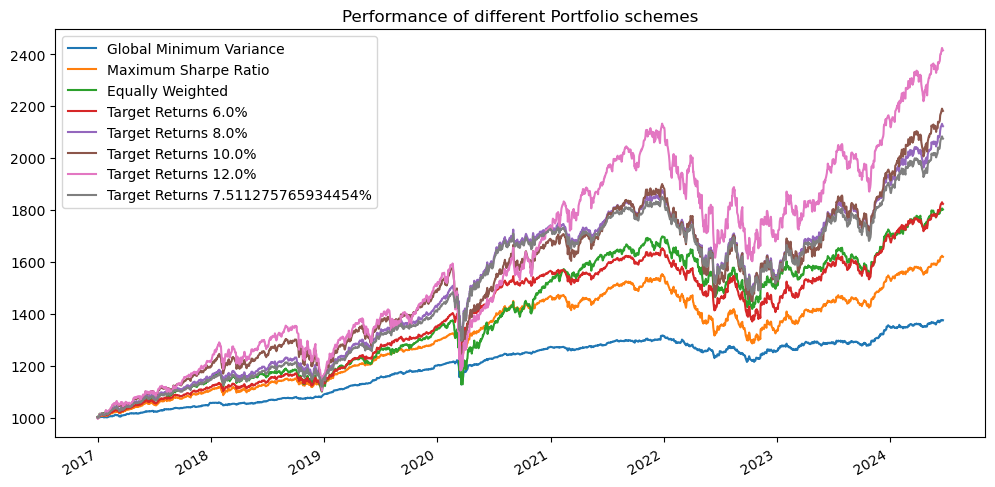

In [44]:
hist.plot(figsize=(12, 6), title= 'Performance of different Portfolio schemes')

In [ ]:
weights_change = fnc.weights_change(weights)

: 

In [30]:
weights_mean = fnc.weights_mean(weights_change)
weights_mean

,Global Minimum Variance,Maximum Sharpe Ratio,Equally Weighted,Target Returns 6.0%,Target Returns 8.0%,Target Returns 10.0%,Target Returns 12.0%,Target Returns 7.440751509399399%
NAESX,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.015111,0.000000
VIVAX,0.055957,0.027724,0.047619,0.018101,0.027349,0.062114,0.060686,0.023110
SPY,0.000000,0.000000,0.047619,0.005447,0.071414,0.171499,0.200000,0.045349
VGTSX,0.011817,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VIMSX,0.000000,0.000000,0.047619,0.000000,0.000000,0.078564,0.176351,0.000000
VISVX,0.000000,0.001536,0.047619,0.003275,0.009667,0.037415,0.071096,0.009254
QQQ,0.000000,0.182384,0.047619,0.187357,0.200000,0.200000,0.200000,0.199062
TLT,0.000000,0.002906,0.047619,0.016729,0.030885,0.046542,0.015123,0.025781
IAU,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000
VWO,0.000000,0.000000,0.047619,0.000000,0.000000,0.000000,0.000000,0.000000


So far I have done a fine numbers of analysis, and what I think will suit best to me right now is a target returns portfolio, whether it's the mean of annual returns or a specific target return. Global minimum variance tends to focus too much on non volatile assets and if I regulate the max asset weight too much it tends to work poorly or very similiar to equally weighted. Maximum sharpe ratio is also fine but it's historical returns are not as good and if I am choosing something other than GMV, I would like to target a bit bigger returns.

I know these returns aren't as good but relative to the volatility of the portfolios they seem great. I would like do some advanced level portfolio contruction later, the main problem I faced here was choosing assets and having enough data to backtest, maybe there are advanced ways to filter markets and select a good number of assets which meets my criteria, but right now historical data is a problem too.

In future if I learn a way to create alpha then maybe it will be much better. But still I think these analysis are great and can be of good use.

## IBKR Execution

In [31]:
ib = IB()

In [ ]:
ib.connect()

In [33]:
ib.positions()

[]

In [34]:
assets = annu_r.index
weights = fnc.minimize_vol(target_return=0.08, er = annu_r, cov = cov, max_asset_weight=0.2)

In [35]:
contracts = []
for asset in assets:
    contract = Stock(asset, "SMART", "USD")
    contracts.append(contract)

In [36]:
contracts

[Stock(symbol='NAESX', exchange='SMART', currency='USD'),
 Stock(symbol='VIVAX', exchange='SMART', currency='USD'),
 Stock(symbol='SPY', exchange='SMART', currency='USD'),
 Stock(symbol='VGTSX', exchange='SMART', currency='USD'),
 Stock(symbol='VIMSX', exchange='SMART', currency='USD'),
 Stock(symbol='VISVX', exchange='SMART', currency='USD'),
 Stock(symbol='QQQ', exchange='SMART', currency='USD'),
 Stock(symbol='TLT', exchange='SMART', currency='USD'),
 Stock(symbol='IAU', exchange='SMART', currency='USD'),
 Stock(symbol='VWO', exchange='SMART', currency='USD'),
 Stock(symbol='BND', exchange='SMART', currency='USD'),
 Stock(symbol='USRT', exchange='SMART', currency='USD'),
 Stock(symbol='EMB', exchange='SMART', currency='USD'),
 Stock(symbol='VCSH', exchange='SMART', currency='USD'),
 Stock(symbol='VCIT', exchange='SMART', currency='USD'),
 Stock(symbol='VGLT', exchange='SMART', currency='USD'),
 Stock(symbol='VONG', exchange='SMART', currency='USD'),
 Stock(symbol='VXUS', exchange='S

In [38]:
data = ib.reqMktData(contracts[2])

ConnectionError: Not connected